### Решение задачи 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

In [2]:
#Читаем CSV-файл
df = pd.read_csv('ratings.csv')

In [3]:
# Оставляем только нужные столбцы
df = df[ ['movieId', 'rating'] ]

In [4]:
# Функция определения рейтинга
def get_class(row):
    movie_class = ''
    
    if row['rating'] <= 2:
        movie_class = 'низкий рейтинг'
    elif row['rating'] > 2 and row['rating'] <= 4:
        movie_class = 'средний рейтинг'
    elif row['rating'] > 4:
        movie_class = 'высокий рейтинг'
        
    return movie_class



def classificate(df):
    df['class'] = df.apply(get_class, axis=1)
    return df

# Запуск функции    
classificate(df).head()

,movieId,rating,class
0,31,2.5,средний рейтинг
1,1029,3.0,средний рейтинг
2,1061,3.0,средний рейтинг
3,1129,2.0,низкий рейтинг
4,1172,4.0,средний рейтинг


### Решение задачи 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [5]:
import pandas as pd

In [6]:
# Словарь с гео
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}


In [7]:
#Читаем CSV-файл
df = pd.read_csv('keywords.csv')

In [8]:
# Функция определения региона
def geo_classificate(row):
    
    for region in geo_data.keys():    
        if row['keyword'].lower() in str(geo_data[region]).lower():
            return region
    
    return 'undefined'

In [9]:
# Добавляем новый столбец с регионом в df
df['region'] = df.apply(geo_classificate, axis=1)

In [10]:
# Для контроля смотрим сколько получилось слов с каждым регионом
df.groupby('region').count().reset_index()[['region','keyword']]

,region,keyword
0,undefined,99926
1,Дальний Восток,29
2,Северо-Запад,21
3,Центр,25


### Решение задачи 3
Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

Константин, не нашел нужный файл, поэтому сделал на примере другого файла, немного изменив алгоритм :)

In [12]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [13]:
#Читаем CSV-файл
df = pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [14]:
# Функця перевода timestamp в Год
def ts_toYear(row):
    return int(datetime.fromtimestamp(row['timestamp']).year)

In [15]:
# Добавляем новый столбец с годом
df['year'] = df.apply(ts_toYear, axis=1).astype(int)

In [16]:
# Считаем средний рейтинг по году
df = df.groupby('year')['rating'].mean().reset_index()

# Сортируем по-убыванию
print_df = df.sort_values(by='rating', ascending=False)
print_df

,year,rating
15,2010,3.716839
4,1999,3.703101
0,1995,3.666667
5,2000,3.659240
2,1997,3.626290
20,2015,3.621180
10,2005,3.620723
17,2012,3.615584
1,1996,3.596089
18,2013,3.576181


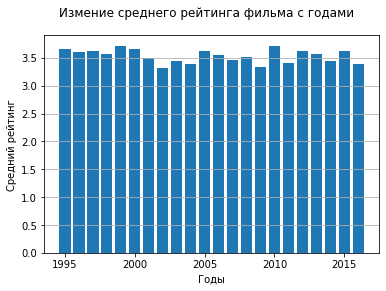

In [17]:
# Для большей наглядности смотрим рейтинг с помощью визуализации
plt.suptitle('Измение среднего рейтинга фильма с годами')

plt.xlabel('Годы')
plt.ylabel('Средний рейтинг')

plt.bar(df['year'], df['rating'])
plt.grid(which='major', axis='y')
